In [ ]:
#Q.1
form Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
#Hierarchical Clustering:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


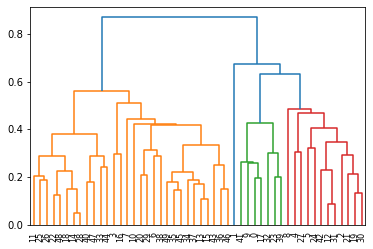

In [5]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [6]:
# create clusters
clust = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
clust

AgglomerativeClustering(linkage='single', n_clusters=4)

In [7]:
# save clusters for chart
y_clust = clust.fit_predict(df_norm)
Clusters=pd.DataFrame(y_clust,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,3
2,0
3,0
4,0


In [8]:
df1=pd.concat([df,Clusters],axis=1)
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

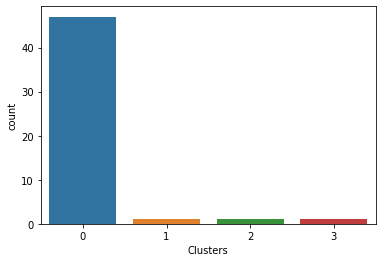

In [9]:
sns.countplot(df1["Clusters"])

In [10]:
df1.iloc[:,1:5].groupby(df1.Clusters).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,7.619149,163.87234,65.468085,20.625532
1,5.900000,238.00000,72.000000,15.800000
2,15.400000,335.00000,80.000000,31.900000
3,10.000000,263.00000,48.000000,44.500000


In [11]:
#DBSCAN clustering:

In [12]:
array=df.iloc[:,1:]
array

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [13]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [15]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [16]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [17]:
df2=pd.concat([df,cl],axis=1)
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='count'>

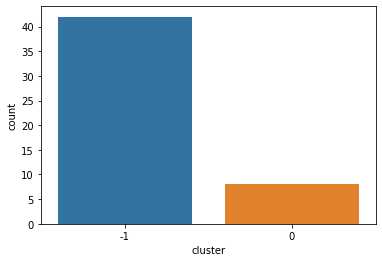

In [18]:
sns.countplot(df2["cluster"])

In [19]:
#k-means clustering

<AxesSubplot:xlabel='Rape', ylabel='Murder'>

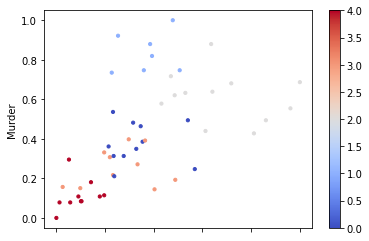

In [20]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=5).fit(df_norm)
model1
df_norm.plot(x="Rape",y="Murder",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

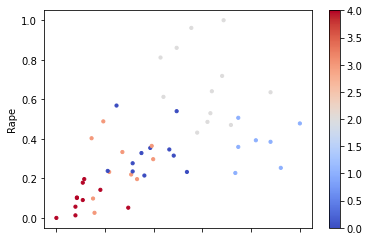

In [21]:
df_norm.plot(x="Murder",y = "Rape",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

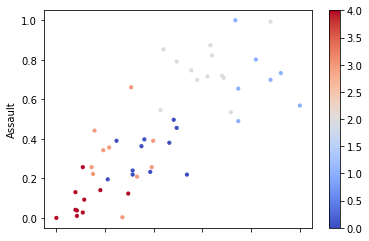

In [22]:
df_norm.plot(x="Murder",y = "Assault",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


<AxesSubplot:xlabel='Assault', ylabel='UrbanPop'>

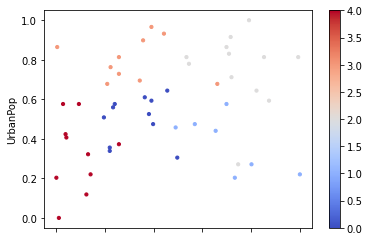

In [23]:
df_norm.plot(x="Assault",y = "UrbanPop",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [24]:
model1.labels_

array([1, 2, 2, 0, 2, 2, 3, 3, 2, 1, 3, 4, 2, 0, 4, 0, 0, 1, 4, 2, 3, 2,
       4, 1, 0, 0, 0, 2, 4, 3, 2, 2, 1, 4, 3, 0, 0, 3, 3, 1, 4, 1, 2, 3,
       4, 0, 3, 4, 4, 0])

In [25]:
cd = pd.Series(model1.labels_)  
df['clust'] = cd 
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


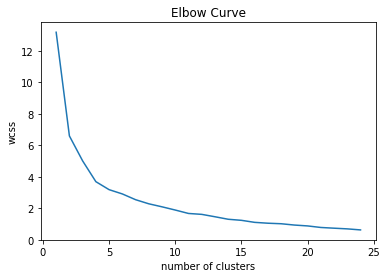

In [26]:
#Alternative Method(k-mmeans)
#Elbow curve
wcss = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('Elbow Curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
model=KMeans(n_clusters=10) 
model.fit(df_norm)

model.labels_

array([2, 8, 5, 1, 3, 3, 0, 1, 5, 2, 9, 6, 5, 1, 6, 1, 1, 2, 4, 5, 0, 5,
       6, 7, 1, 6, 6, 3, 6, 9, 5, 5, 7, 4, 9, 1, 1, 9, 0, 7, 4, 2, 5, 9,
       4, 1, 9, 4, 6, 1])

In [28]:
md = pd.Series(model.labels_)  
df['clust'] = md 
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,8
2,Arizona,8.1,294,80,31.0,5
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,5
9,Georgia,17.4,211,60,25.8,2


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clust', ylabel='count'>

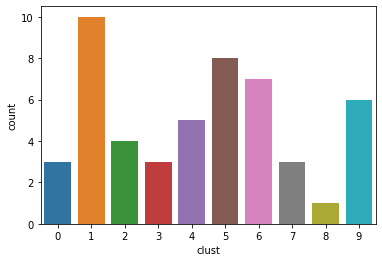

In [29]:
sns.countplot(df["clust"])

In [30]:
df.iloc[:,1:5].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.700000,144.333333,83.000000,11.900000
1,7.340000,157.000000,63.300000,20.440000
2,14.800000,221.000000,60.750000,24.025000
3,9.700000,244.000000,83.333333,41.766667
4,2.920000,68.600000,42.200000,9.680000
5,11.562500,271.625000,77.500000,29.187500
6,3.214286,81.285714,59.142857,13.371429
7,14.500000,291.666667,45.666667,18.566667
8,10.000000,263.000000,48.000000,44.500000


In [ ]:
#Q.2
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [31]:
#Hierarchical Clustering:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("EastWestAirlines.csv")  
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [33]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [34]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,1:])
data_norm.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


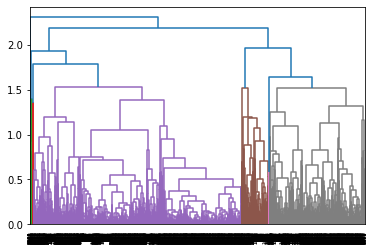

In [35]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm,  method='complete'))

In [36]:
# create clusters
hc= AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [37]:
# save clusters for chart
y_hc = clust.fit_predict(data_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [38]:
 data1=pd.concat([data,Clusters],axis=1)
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [39]:
data1.iloc[:,0:12].groupby(data1.Clusters).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,1743.580122,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0
3,2862.000000,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

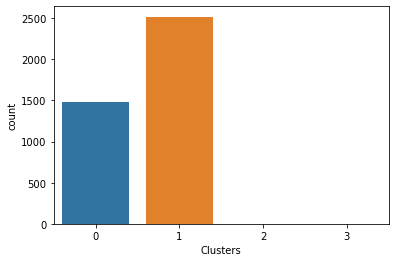

In [40]:
sns.countplot(data1["Clusters"])

In [41]:
#DBSCAN clustering:

In [42]:
array=data.iloc[:,1:]
array

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [43]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [45]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [47]:
data2=pd.concat([data,cl],axis=1)
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [48]:
data2.iloc[:,1:12].groupby(data2.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878
0,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000
1,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000
2,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000
3,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='count'>

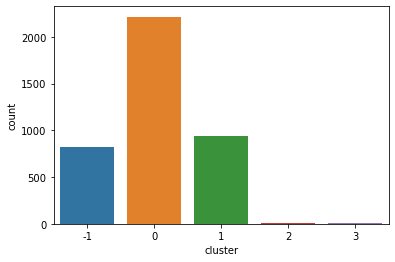

In [49]:
sns.countplot(data2["cluster"])

In [50]:
#k-means clustering

In [51]:
from sklearn.cluster import KMeans

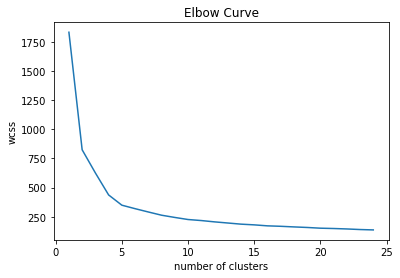

In [52]:
#Elbow curve
wcss = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('Elbow Curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
model=KMeans(n_clusters=6) 
model.fit(data_norm)

model.labels_

array([4, 4, 4, ..., 5, 2, 2])

In [54]:
cd = pd.Series(model.labels_)  
data['clust'] = cd 
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [55]:
data.iloc[:,1:12].groupby(data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
3,151480.271768,238.612137,4.408971,1.002639,1.052770,62561.002639,22.179420,925.646438,2.751979,6216.153034,1.0
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
5,70185.142191,162.755245,3.480186,1.000000,1.002331,30633.993007,18.454545,526.510490,1.603730,3668.384615,1.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clust', ylabel='count'>

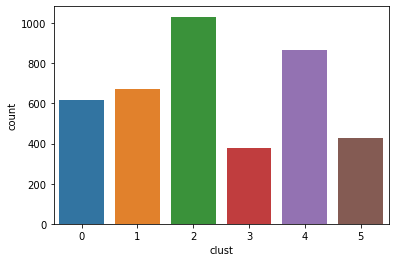

In [56]:
sns.countplot(data["clust"])

In [ ]:
#conclusion:
*here,we can conclude that DBSCAN is best clustering method for obtaining clusters.